## <center> Survey of students of class at FSEV UK </center>

**The Agenda is to find whether Spending Habits and Healthy Lifestyle is related to Gender and Place or not.**

**Steps:**

1. Load the data and extract the relevant columns.
2. Hint – Relevant Columns will be Finances, Gender, Village-Town and Healthy Eating.

3. Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights.
4. Create Hypothesis on the following questions – <br>
    (a) Is saving money (finances) gender dependant? <br>
    (b) Is there any differences in money saving (finances) between people from city or village? <br>
    (c) Do Women have a Healthier Lifestyle than Men? <br>
    (d) Are Village People Healthier than City People?
    
Perform the required statistical tests to validate/reject the Hypothesis in above step.
State your insights and conclusions.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import levene

#### Read the data:

In [2]:
responses_df = pd.read_csv('responses.csv',na_values=' ')

#### View the dataset head:

In [3]:
responses_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


#### View the dataset tail

In [4]:
responses_df.tail()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
1009,5.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,...,21.0,185.0,72.0,1.0,male,right handed,secondary school,no,village,house/bungalow


#### Check the shape of dataset

In [5]:
responses_df.shape

(1010, 150)

#### Extracting relevant columns - Finances, Gender, Village-Town and Healthy Eating:

In [6]:
responses_t_df = responses_df[['Finances', 'Gender', 'Village - town', 'Healthy eating']]

#### Analyzing the data using describe

In [7]:
responses_t_df.describe(include='all')

,Finances,Gender,Village - town,Healthy eating
count,1007.000000,1004,1006,1007.000000
unique,NaN,2,2,NaN
top,NaN,female,city,NaN
freq,NaN,593,707,NaN
mean,3.023833,NaN,NaN,3.031778
std,1.144365,NaN,NaN,0.936865
min,1.000000,NaN,NaN,1.000000
25%,2.000000,NaN,NaN,3.000000
50%,3.000000,NaN,NaN,3.000000
75%,4.000000,NaN,NaN,4.000000


#### Check if there are values in "Finances" & "Healthy eating" that do not lie in the 0 - 5 valid range:

In [8]:
responses_t_df[(responses_t_df.iloc[:,[0,3]] < 0.0) | (responses_t_df.iloc[:,[0,3]] > 5.0)].isna().sum()

Finances          1010
Gender            1010
Village - town    1010
Healthy eating    1010
dtype: int64

Since NaN row count is same as input dataset row count, all the values are within the 0 - 5 range. So we are good to proceed

#### Check for missing values:

In [9]:
responses_t_df.isna().sum()

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

Missing values are present and it needs to be handled

#### Fill in missing values with the mode of the corresponding columns:

I will be filling the missing values with mode. Since "Finances" & "Healthy eating" are discrete numeric data as they are the results of a survey, and the columns "Gender" & "Village - town" are categorical in nature, filling missing values with median or mean didn't sound appropriate.

In [10]:
mode = responses_t_df.filter(['Finances', 'Gender', 'Village - town', 'Healthy eating']).mode()
responses_t_df = responses_t_df[['Finances', 'Gender', 'Village - town', 'Healthy eating']].fillna(value=mode.iloc[0])

#### Check for missing values again:

In [11]:
responses_t_df.isna().sum()

Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64

Missing values are handled and we are good to proceed

#### Finding if outliers are present in data:

#### <font color=Teal>(i) Boxplot Method </font>

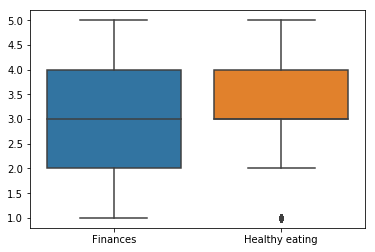

In [12]:
sns.boxplot(data=responses_t_df)

Box-plot shows that Low-Outliers are present in 'Healthy eating' column data. Let's verify the data using IQR check:

#### <font color=Teal>(ii) IQR check </font>

In [13]:
def find_outliers(data,column):
# Find the 25th and 75th percentiles:
    q1, q3 = np.percentile(data,[25,75])
# Find Inter-Quartile Range (IQR):
    iqr = q3 - q1
# Find lower bound value:
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    print('\n\033[1mFinding outliers in', column, ': \033[0m')
    print('\nLower bound of data: ', lower_bound)
    print('Upper bound of data: ', upper_bound)
    
    lower_outlier_count = 0
    upper_outlier_count = 0
    
    for i in data:
        if i < lower_bound:
            lower_outlier_count += 1
        elif i > upper_bound:
            upper_outlier_count += 1
    
    print('\nCount of Lower Outliers if any: ',lower_outlier_count)
    print('Count of Upper Outliers if any: ',upper_outlier_count)


# Call find_outliers function for "Finances" & "Healthy eating" columns:
find_outliers(responses_t_df["Finances"], "Finances")
find_outliers(responses_t_df["Healthy eating"], "Healthy eating")


Finding outliers in Finances : 

Lower bound of data:  -1.0
Upper bound of data:  7.0

Count of Lower Outliers if any:  0
Count of Upper Outliers if any:  0

Finding outliers in Healthy eating : 

Lower bound of data:  1.5
Upper bound of data:  5.5

Count of Lower Outliers if any:  81
Count of Upper Outliers if any:  0


IQR also shows presence of outliers in "Healthy eating". Let's review the data in "Healthy eating"

In [14]:
responses_t_df["Healthy eating"].value_counts()

3.0    507
4.0    239
2.0    137
1.0     81
5.0     46
Name: Healthy eating, dtype: int64

#### <font color=Teal> Inference: </font>
    
    Count of lower outliers is 81, which is the count of survey result "1". Since 1 is less than our lower bound value of   1.5, our IQR check has projected 1 as an outlier, whereas ideally it is not.
    
    So I will not be considering this as an outlier, as 1 is a valid survey result.

## Hypothesis testing:

### <font color=blue>1. Is saving money (finances) gender dependent? </font>

#### <font color=Teal> Step 1: Define null and alternative hypothesis </font>

In testing whether saving money is gender dependent, **the null hypothesis states that** there is no association between saving money and gender. **The alternative hypothesis states that** there is association between saving money and gender.

#### <font color=Teal> Step 2: Decide the significance level </font>

Here we select $\alpha$ = 0.05 

#### <font color=Teal> Step 3: Calculate the p - value </font>

Using chi square test to test if saving money is gender dependent.

#### Create Contingency table for Chi square test:

In [15]:
cross_tab=pd.crosstab(responses_t_df["Gender"],responses_t_df["Finances"])
print('\033[1mContingency_table :-\033[0m\n',cross_tab)

Contingency_table :-
 Finances  1.0  2.0  3.0  4.0  5.0
Gender                           
female     65   98  223  150   63
male       60   76  138  102   35


#### Perform Chi Square test

In [16]:
# Chi square test:

chi_sq_Stat, chi_p_value, deg_freedom, expected_values = stats.chi2_contingency(cross_tab)

print('\033[1mChi-square statistic:\033[0m %3.5f \n\n\033[1mChi-square p value:\033[0m %1.6f \n\n'
      '\033[1mDegrees of freedom:\033[0m %d' 
      %(chi_sq_Stat, chi_p_value, deg_freedom))
print('\n\033[1mExpected values: \n\033[0m', expected_values)

Chi-square statistic: 5.32889 

Chi-square p value: 0.255185 

Degrees of freedom: 4

Expected values: 
 [[ 74.13366337 103.19405941 214.0980198  149.45346535  58.12079208]
 [ 50.86633663  70.80594059 146.9019802  102.54653465  39.87920792]]


####  <font color=Teal> Step 4:  Decide to reject or accept null hypothesis </font>

Here, p value is 0.255185 and it is more than 5% level of significance

So the statistical decision is to accept the null hypothesis at 5% level of significance.

##### So there is no sufficient evidence to reject the null hypothesis and we accept that there is no significant association between saving money and gender

### <font color=blue> 2. Is there any difference in money saving (finances) between people from city or village? </font>

#### <font color=Teal> Step 1: Extract Necessary data: </font>

In [17]:
city_finances = responses_t_df[responses_t_df['Village - town'].str.lower() == 'city']['Finances']
village_finances = responses_t_df[responses_t_df['Village - town'].str.lower() == 'village']['Finances']

#### <font color=Teal> Step 2: Define null and alternative hypothesis </font>

In testing whether there is any difference in money saving between people from city or village, **the null hypothesis states that** there is no significant difference in money saving between people from city or village, $\mu{C}$ equals $\mu{V}$. **The alternative hypothesis states that** there is significant difference in money saving between people from city or village, $\mu{C}$ $\neq$ $\mu{V}$ 

* $H_0$: $\mu{C}$ - $\mu{V}$ =      0   (No significant difference in money saving between people from city or village)
* $H_A$: $\mu{C}$ - $\mu{V}$ $\neq$  0 (There is significant difference in money saving between people from city or village)

#### <font color=Teal> Step 3: Decide the significance level </font>

Here we select $\alpha$ = 0.05 

#### <font color=Teal> Step 4: Levene's test to test equality of variances </font>

#### Significance Level:

Here we select $\alpha$ = 0.05 

#### Null & Alternative hypothesis:

* Null Hypothesis: All input samples are from populations with equal variances <br>
* Alternative hypothesis: All input samples are from populations with different variances

#### Perform Levene's test:

In [18]:
# Levene's test:

lev_statistic, lev_p_value = levene(village_finances, city_finances)
print("\033[1mt statistic for Levene's test:\033[0m %3.5f \n\n\033[1mp value for Levene's test:\033[0m %1.6f" 
      %(lev_statistic, lev_p_value))

t statistic for Levene's test: 4.44526 

p value for Levene's test: 0.035245


Here p value is less than 0.05, so we **reject the null hypothesis** and accept that the input samples are from populations with different variances

#### <font color=Teal> Step 5: Calculate the p - value and test statistic </font>

Using scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of saving money given the two sample observations.


In [19]:
t_statistic, p_value  =  stats.ttest_ind(village_finances, city_finances, equal_var=False, nan_policy='omit')
print('\033[1mt statistic for ttest:\033[0m %3.5f \n\n\033[1mp value for ttest:\033[0m %1.6f' %(t_statistic, p_value))

t statistic for ttest: 2.57676 

p value for ttest: 0.010245


#### <font color=Teal> Step 6:  Decide to reject or accept null hypothesis </font>

Here, p value is 0.010245 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

##### So there is sufficient evidence to reject the null hypothesis and we accept that saving money is different for people between city and village

### <font color=blue> 3. Do Women have a Healthier Lifestyle than Men? </font>

#### <font color=Teal> Step 1: Extract Necessary data: </font>

In [20]:
women_health = responses_t_df[responses_t_df['Gender'].str.lower() == 'female']['Healthy eating']
men_health = responses_t_df[responses_t_df['Gender'].str.lower() == 'male']['Healthy eating']

#### <font color=Teal> Step 2: Define null and alternative hypothesis </font>

In testing whether women have a healthier lifestyle than men, **the null hypothesis states that** mean healthier Lifestyle is equal for women and men, $\mu{W}$ equals $\mu{M}$. **The alternative hypothesis states that** women have a healthier Lifestyle than men $\mu{W}$ $\gt$ $\mu{M}$

* $H_0$: $\mu{W}$ - $\mu{M}$ =      0   (No significant difference in healthier lifestyle between women and men)
* $H_A$: $\mu{W}$ - $\mu{M}$ $\gt$  0 (Women have healthier lifestyle than men)

#### <font color=Teal> Step 3: Decide the significance level </font>

Here we select $\alpha$ = 0.05 

#### <font color=Teal> Step 4: Levene's test to test equality of variances </font>

#### Significance Level:

Here we select $\alpha$ = 0.05 

#### Null & Alternative hypothesis:

* Null hypothesis: All input samples are from populations with equal variances <br>
* Alternative hypothesis: All input samples are from populations with different variances

#### Perform Levene's test:

In [21]:
# Levene's test
lev_statistic, lev_p_value = levene(women_health, men_health)
print("\033[1mt statistic for Levene's test:\033[0m %3.5f \n\n\033[1mp value for Levene's test:\033[0m %1.6f" 
      %(lev_statistic, lev_p_value))

t statistic for Levene's test: 19.47805 

p value for Levene's test: 0.000011


Here p value is less than 0.05, so we **reject the null hypothesis** and accept that the input samples are from populations with different variances

#### <font color=Teal> Step 5: Calculate the p - value and test statistic </font>

Using scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of healthy eating given the two sample observations.

In [22]:
t_statistic, p_value  =  stats.ttest_ind(women_health, men_health, equal_var=False, nan_policy='omit')
print('\033[1mt statistic for ttest:\033[0m %3.5f \n\n\033[1mp value for ttest:\033[0m %1.6f' %(t_statistic, p_value))

t statistic for ttest: 1.91761 

p value for ttest: 0.055534


#### <font color=Teal> Step 6:  Decide to reject or accept null hypothesis </font>

Here, p value is 0.055534 and it is greater than 5% level of significance

So the statistical decision is to accept the null hypothesis at 5% level of significance.

##### So there is no sufficient evidence to reject the null hypothesis and we accept that there is no significant difference in healthier lifestyle between women and men

### <font color=blue> 4. Are Village People Healthier than City People? </font>

#### <font color=Teal> Step 1: Extract Necessary data: </font>

In [23]:
city_health = responses_t_df[responses_t_df['Village - town'].str.lower() == 'city']['Healthy eating']
village_health = responses_t_df[responses_t_df['Village - town'].str.lower() == 'village']['Healthy eating']

#### <font color=Teal> Step 2: Define null and alternative hypothesis </font>

In testing whether village people are healthier than city people, **the null hypothesis states that** mean health is equal for people from village and city, $\mu{V}$ equals $\mu{C}$. **The alternative hypothesis states that** village people are healthier than city people, $\mu{V}$ $\gt$ $\mu{C}$

* $H_0$: $\mu{V}$ - $\mu{C}$ =      0   (No significant difference in health between Village & City people)
* $H_A$: $\mu{V}$ - $\mu{C}$ $\gt$  0 (Village people are healthier than City people)

#### <font color=Teal> Step 3: Decide the significance level </font>

Here we select $\alpha$ = 0.05 

#### <font color=Teal> Step 4: Levene's test to test equality of variances </font>

#### Significance Level:

Here we select $\alpha$ = 0.05 

#### Null & Alternative hypothesis:

* Null hypothesis: All input samples are from populations with equal variances <br>
* Alternative hypothesis: All input samples are from populations with different variances

#### Perform Levene's test

In [24]:
# Levene's test
lev_statistic, lev_p_value = levene(village_health, city_health)
print("\033[1mt statistic for Levene's test:\033[0m %3.5f \n\n\033[1mp value for Levene's test:\033[0m %1.6f" 
      %(lev_statistic, lev_p_value))

t statistic for Levene's test: 0.02209 

p value for Levene's test: 0.881879


Here p value is greater than 0.05, so we **accept the null hypothesis** that the input samples are from populations with equal variances

#### <font color=Teal> Step 5: Calculate the p - value and test statistic </font>

We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of healthy eating given the two sample observations.


In [25]:
t_statistic, p_value  =  stats.ttest_ind(city_health, village_health, equal_var=True, nan_policy='omit')

print('\033[1mt statistic for ttest:\033[0m %3.5f \n\n\033[1mp value for ttest:\033[0m %1.6f' %(t_statistic, p_value))

t statistic for ttest: 1.06649 

p value for ttest: 0.286459


#### <font color=Teal> Step 6:  Decide to reject or accept null hypothesis </font>

Here, p value is 0.286459 and it is significantly higher than 5% level of significance

So the statistical decision is to accept the null hypothesis at 5% level of significance.

##### <font color=Midnight> So there is no sufficient evidence to reject the null hypothesis and we accept that there is no significant difference in the healthier lifestyle of people from city and village. </font>

### <center>End of Statistical Learning - Project 2</center>